In [1]:
%pylab nbagg

Populating the interactive namespace from numpy and matplotlib


# Assignment 1

As for Quiz 1, create a new directory called `Assignment.1` in your own mp248 repository. Add all answer files to that directory, and add to your BitBucket repository. Our grading script will pull the assignment from there, starting around Monday morning. It will perform several tests on your assignment work as it becomes available. It is ok to submit work early, including partially finished work, so that you can get initial feedback through the automatic grading script. After the submission deadline, which is Friday Jan 26, TAs will manual grade your assignment and leave you with some comments. The graded assigments will be pushed back to your own mp248 BitBucket repository.

Refer to the grading scheme for guidance of what is expected. Each part P1, P2.1, P2.2, P2.3 & P2.4 is equally weighted. 

## Problem 1

Download the [textfile](http://www.textfiles.com/etext/AUTHORS/SHAKESPEARE/shakespeare-macbeth-46.txt) containing SHAKESPEARE: Macbeth, using the command line. write a shell script called `shake_analysis.sh` that analyses the file and writes out (one answer per line):
1. How many lines does the file have? 
2. How many lines contain the string "LADY MACBETH".
3. How many lines contain the string "LADY MACBETH" and "must"?
4. What is the 8th word from the line that contains both the word "LADY MACBETH" and "blood"? Output that word.

Finally, create a file `shake.txt` in which all instances of "LADY MACBETH" are replaced with "LADY GAGA".

#### Problem 1 was solved in the command line, using vi editor to create shake_analysis.sh and shake.txt. (Wasn't sure if I was supposed to do it in this notebook or not so I went with my gut!)

## Problem 2
The [Gaussian function](https://en.wikipedia.org/wiki/Gaussian_function) is given by 
$$
f(x) = a e^{-\frac{(x-b)^2}{2c^2}}
$$

### P2.1
* Create a function called `gauss` in python that evaluates the Gaussian function for the required input parameter `x` and the optional parameters `a`, `b`, `c`. Use `a=c=1` and `b=0` as default. Make sure you include a doc string in your function. Test your function for various input parameters. 
* Create a python module with the name `functions.py` and add this function to `functions.py`. 
* Open an output file called `gaus_int.out`. What is $f(1)$ when $a, b, c$ are the default value. Write your answer with 3 significant digits to the file `gaus_int.out` in a full sentence using formatted `printf` specifications.

In [2]:
def gauss(x, a=1, b=0, c=1):
    return (a*np.exp(-(x-b)**2/2*c**2))

In [3]:
#testing gaussian function for correct output.
gauss(1), gauss(2), gauss(3)

(0.60653065971263342, 0.1353352832366127, 0.011108996538242306)

In [5]:
#functions.py, contains gaussian function created above
import functions as fun

In [6]:
#some testing of the function and module for various input parameters
x1=fun.gauss(1)
x2=fun.gauss(2)
x3=fun.gauss(3)

x1, x2, x3

(0.60653065971263342, 0.1353352832366127, 0.011108996538242306)

In [7]:
#creating file, writing to it, then closing it
!touch gaus_int.out
f=open('gaus_int.out', 'r+')

In [8]:
f.write("%.3f is our value for f(1) under default values a, b, and c \n"%(x1))

62

In [9]:
f.close()

### P2.2
Make a plot of the Gaussian function for $x \in [-3,5]$ for
- default
- $a=0.5$
- $b=1$
- $c=0.5$
Provide a legend for each line, and of course axis labels as well. Use a different line style for each line. Briefly describe the meaning of each parameter.

In [10]:
#creating range of x values
n=100
x=linspace(-3.,5.,n)

##### A brief explaination of the parameters:
x is our input value and a, b, and c are the constants.
as a gets smaller, the curve gets flatter because a is being directly multiplied to e. As c gets smaller, the curve stays at the same height but will get wider. This is because c is the divisor in the exponential expression of the function. The constant b will shift the curve left or right, depending on positive or negative values.

<IPython.core.display.Javascript object>


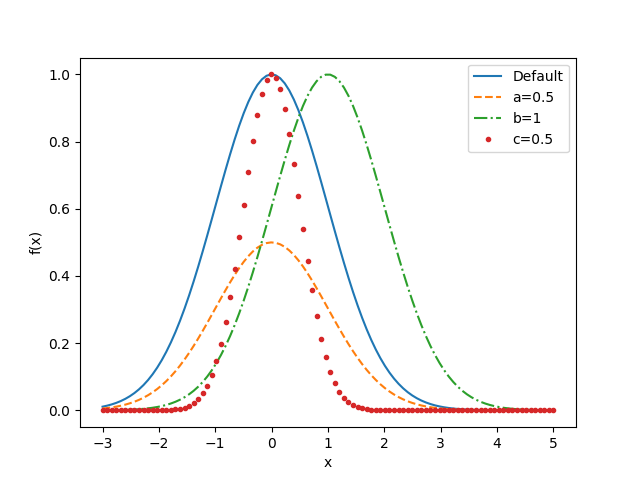

In [11]:
#Plot
plot(x, fun.gauss(x), label = 'Default')
plot(x, fun.gauss(x, a=0.5), "--", label = 'a=0.5')
plot(x, fun.gauss(x, b=1), "-.", label = 'b=1')
plot(x, fun.gauss(x, c=0.5), '.', label = 'c=0.5')
legend(loc=0)
xlabel('x')
ylabel('f(x)')

### P2.3
Integrate the Gaussian function for $c = \sqrt \frac{1}{2}$ default in a given interval $x \in [-x_b,x_b]$ by approximating the curve under the graph by _right trapezoids_ where the height of the left and right boundary of the $\Delta x$ interval are separately evaluated, and their average is taken to be the height of the rectangle ([Trapezoidal rule](https://en.wikipedia.org/wiki/Trapezoidal_rule)). 

1. Create a function with the name `sym_gauss_int_sqr` that computes the square of the total area under the curve inside the interval. Save the function in a module file with the name `integrate.py`. The function should have two input parameters: 
    * `xb` is the boundary of the integration interval $[-x_b,x_b]$
    * `n` is the number of grid cells in the x direction to be used in the numerical integration. `n` should be an optional argument and the default should be `n=10`.
2. Using your function determine the answer for the interval boundary $x_b = 3$. What is that number called? Add to the file `gaus_int.out` a line with a string with the name of the number, and in the second line the answer from executing your function as described above, as a floating point number with 3 significant digits. 
3. For this integral, how many grid cells in the x direction do you need to get a result at $\leq 0.1\%$ precision? Add your answer to the file `gaus_int.out` by writing in python a formatted output string `The precision is better than 1.0e-03 for n >= [your answer] . ` to that file.
4. Using that number of grid cells, determine the minimum interval boundary `xb_min` provided with two significant digits so that the square of the integration over the interval $[-xb_min,xb_min]$ contains a fraction of $99\%$ of the square of the area, that you would get if you integrated over $[-\inf,\inf]$. Write another line to your output file like this: 
`Interval boundary  >= [your number here] for > 99% of the square of the indefinite integral included.`

In [3]:
def sym_gauss_int_sqr(xb, n=10):
    y=np.linspace(-xb,xb,n)
    trapezoids = 0
    for i in y:
        h1=f.gauss(i, c=np.sqrt(0.5))
        h2=f.gauss(i+1, c=np.sqrt(0.5))
        trapezoids +=(((2*xb)/(n-1))*((h1+h2)/2))
    return (trapezoids**2)

In [4]:
import integrate as tg

In [8]:
#calling integrate for value xb=3
p = tg.sym_gauss_int_sqr(3)
ps = "pi"
p

3.1406072949886474

In [ ]:
#writing to gaus_int.out
f=open('gaus_int.out', 'a') #a for append
f.write("%s is the name of \n %.3f \n"%())

### P2.4
Create a plot of the two-dimensional Gaussian function
$$
h(x,y) = \exp{-(x^2 + y^2)}
$$
for $x \in [-1,1.2]$ and $y \in [-1,1.5]$. 
Do both a 
* 3D surface plot, and a
* contour plot with labels.

In [45]:
#creating domain and range
a1=linspace(-1,1.2,75)
a2=linspace(-1,1.5,75)

In [46]:
#creating the data w/ the function
xv,yv = meshgrid(a1,a2)
Z=np.exp(-(xv**2 + yv**2))

<IPython.core.display.Javascript object>


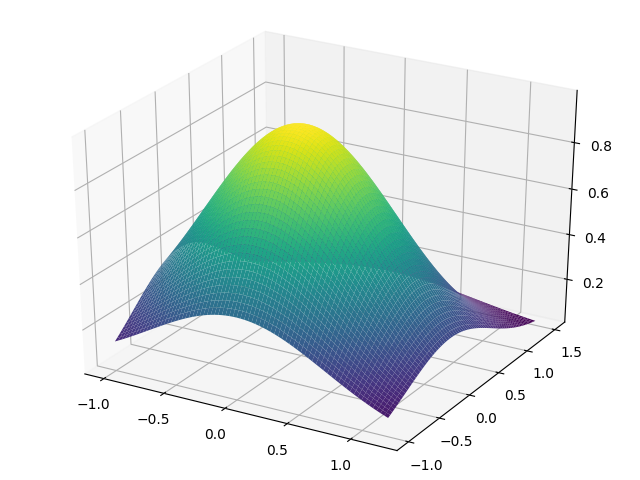

In [47]:
#3D surface plot
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
fig = plt.figure()
ax = Axes3D(fig)
Axes3D.plot_surface(ax, xv, yv, Z, rstride=1, cstride=1, cmap=cm.viridis)
plt.show()

<IPython.core.display.Javascript object>


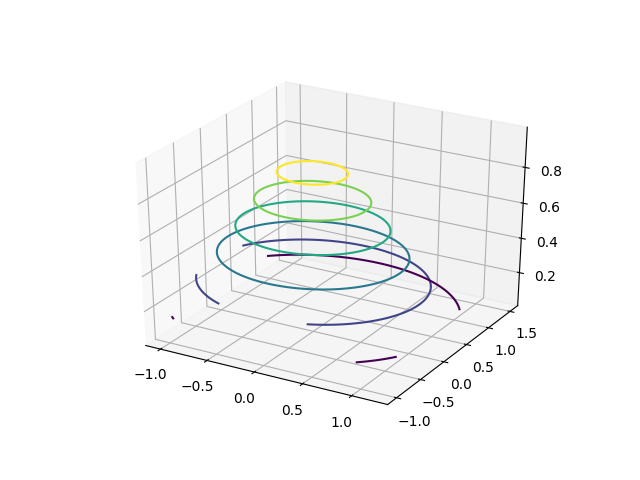

In [73]:
#3D Contour plot
fig = plt.figure()
ax = fig.gca(projection='3d')
cset = ax.contour(xv, yv, Z, cmap=cm.viridis)
ax.clabel(cset, fontsize=10, inline=1)